<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Model_Concepts/Classification_Performance_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PERFORMANCE MATRICES

For classification problems:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
dt=pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\Bank_data.csv',index_col=0)
dt.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [ ]:
dt.y=dt.y.map({'yes':1,"no":0})
dt.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dt.drop('y',axis=1),dt.y,test_size=0.3)

In [ ]:
lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,y_train)
pred_kn=kn.predict(X_test)

In [ ]:
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

# 1. Confusion matrix

Below, we can only see the matrix. In scikit learn package the matrix is shown such that the actual values are rows and predicted ones are represented by columns.

In [ ]:
print('Confusion matrix: ', '\n',metrics.confusion_matrix(y_test,pred_lr))
print('Accuracy: ','\n', metrics.accuracy_score(y_test,pred_lr).round(2))

Confusion matrix:  
 [[68 18]
 [ 6 64]]
Accuracy:  
 0.85


In [ ]:
print('Confusion matrix: ', '\n',metrics.confusion_matrix(y_test,pred_kn))
print('Accuracy: ','\n', metrics.accuracy_score(y_test,pred_kn).round(2))

Confusion matrix:  
 [[60 26]
 [16 54]]
Accuracy:  
 0.73


In [ ]:
print('Confusion matrix: ', '\n',metrics.confusion_matrix(y_test,pred_clf))
print('Accuracy: ','\n', metrics.accuracy_score(y_test,pred_clf).round(2))

Confusion matrix:  
 [[65 21]
 [12 58]]
Accuracy:  
 0.79


**Accuracy** is the number of correct predictions made by the model over all kinds predictions made.

$$ Accuracy=\frac{TP+TN}{Total} $$

Accuracy is a good measure when the target variable classes in the data are nearly balanced.Accuracy should NEVER be used as a measure when the target variable classes in the data are a majority of one class.

**Misclassification rate** or Error rate is the number of wrong predictions made by the model
$$Misclassification Rate=1-Accuracy=\frac{FP+FN}{Total}$$

In [ ]:
dt.y.value_counts() # thus, accuracy is a good maeasure.

1    259
0    259
Name: y, dtype: int64

# 2. Classification Report

In [ ]:
print('Classification report consists of the scores of Precisions, Recall, F1 and Support as follows:','\n\n\n',
      'KNN:',
      metrics.classification_report(y_test,pred_kn))
print( 'RF:',   metrics.classification_report(y_test,pred_clf))

Classification report consists of the scores of Precisions, Recall, F1 and Support as follows: 


 KNN:               precision    recall  f1-score   support

           0       0.79      0.70      0.74        86
           1       0.68      0.77      0.72        70

    accuracy                           0.73       156
   macro avg       0.73      0.73      0.73       156
weighted avg       0.74      0.73      0.73       156

RF:               precision    recall  f1-score   support

           0       0.84      0.76      0.80        86
           1       0.73      0.83      0.78        70

    accuracy                           0.79       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.79      0.79      0.79       156



### Metrics:
Given confusion matrix as :

![image.png](attachment:image.png)
    
Note: FP= falsely predicted= Type 1 error and FN= Falsely Predicted negative class= Type 2 error. 
     
     
**Precision**
Precision is defined  as the no of times the model correctly predicted a category. see horizontally, the categories

$$ Precision=\frac{TP}{pred yes}= \frac{TP}{TP+FP}$$

**Recall or Sensitivity -- True Positive Rate**
is defined as the no of times the results were correctly identified by the model. see vertically, the categories

$$Recall=\frac{TP}{Actual Yes}= \frac{TP}{TP+FN}$$

**Specificity**
Specificity is defined as the total no of times results were incorrectly identified by the model.

$$Specificity=\frac{TN}{TN+FP}=1-FPR$$

**False Positive Rate**

$$FPR=\frac{FP}{Actual No}=\frac{FP}{FP+TN} $$

**F1 Score**
This score will give us the harmonic mean of precision and recall. Mathematically, F1 score is the weighted average of the precision and recall. The best value of F1 would be 1 and worst would be 0. We can calculate F1 score with the help of following formula −

$$F1=2∗\frac{(precision∗recall)}{(precision+recall)}$$
F1 score is having equal relative contribution of precision and recall.

**Support**
Support may be defined as the number of samples of the true response that lies in each class of target values.

### When to use Precision and When to use Recall?

It is clear that recall gives us information about a classifier’s performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives(how many did we caught).

So basically if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to focus on minimising False positives, then our focus should be to make Precision as close to 100% as possible.

Remember that the choice of metric and the definition for positive and negative class depends on your business objective
For example
- in case of **Spam filter** (where positive class is "spam"), Optimize for precision and specificity beacuse false negatives (spam into inbox) are more acceptable  than false positive (non spam is caught as spam).
- in case of **Fradulent Transaction detector** (where positive class is "fraud"), optimize for sensitivity/ recall because false positives (normal transactions that are flagged as fraud) is more acceptable than false negatives (fradulent transactions that are not detected)

# 3. ROC- AUC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

The true-positive rate is also known as sensitivity or recall in machine learning. The false-positive rate can be calculated as (1 − specificity).


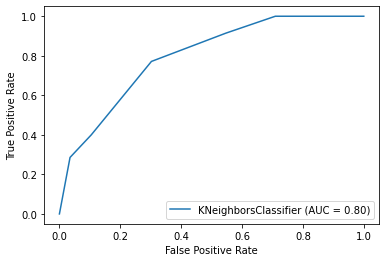

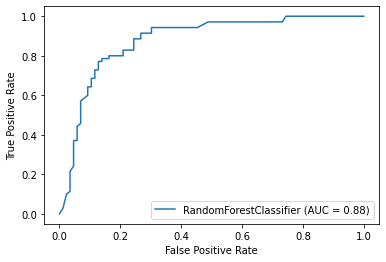

In [ ]:
metrics.plot_roc_curve(kn,X_test, y_test)
metrics.plot_roc_curve(clf,X_test, y_test)
plt.show()

In [ ]:
print('KN:',metrics.roc_auc_score(y_test,pred_kn))
print('RF:',metrics.roc_auc_score(y_test,pred_clf))
print('LR:',metrics.roc_auc_score(y_test,pred_lr))

KN: 0.7345514950166112
RF: 0.7921926910299004
LR: 0.8524916943521593


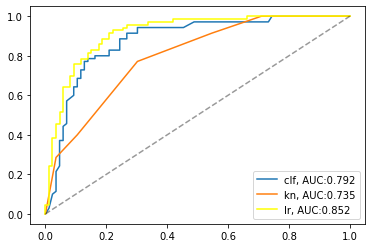

In [ ]:
pred_prob_clf=clf.predict_proba(X_test)[::,1] # predict proba gives the probability for targets 0 or 1. we take the prob of 1.
pred_prob_kn=kn.predict_proba(X_test)[::,1]
pred_prob_lr=lr.predict_proba(X_test)[::,1]
fpr1,tpr1,threshold1=metrics.roc_curve(y_test,pred_prob_clf)
fpr2,tpr2,threshold2=metrics.roc_curve(y_test,pred_prob_kn)
fpr3,tpr3,threshold3=metrics.roc_curve(y_test,pred_prob_lr)
auc1=metrics.roc_auc_score(y_test,pred_clf)
auc2=metrics.roc_auc_score(y_test,pred_kn)
auc3=metrics.roc_auc_score(y_test,pred_lr)
plt.plot(fpr1,tpr1,label='clf, AUC:'+str(auc1.round(3)))
plt.plot(fpr2,tpr2,label='kn, AUC:'+str(auc2.round(3)))
plt.plot(fpr3,tpr3,label='lr, AUC:'+str(auc3.round(3)),color='yellow')
plt.plot([0,1],[0,1],linestyle="--",color='black',alpha=0.4)
plt.legend(loc=4)
plt.show()